<a href="https://colab.research.google.com/github/KaioLopesS/Classification_Stars/blob/main/Classification_stars_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classifying types of stars**

# Importing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dados = pd.read_csv('/content/6 class csv.csv')

# Checking for missing data (NaN)

In [ ]:
dados.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [ ]:
dados['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
dados.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
dados.shape

(240, 7)



    Brown Dwarf -> Star Type = 0

    Red Dwarf -> Star Type = 1

    White Dwarf-> Star Type = 2

    Main Sequence -> Star Type = 3

    Supergiant -> Star Type = 4

    Hypergiant -> Star Type = 5


In [ ]:
dados['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

# Separation of features and the target variable

In [ ]:
y = dados['Star type']
x = dados.drop('Star type', axis = 1)

In [ ]:
x

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Blue,O
237,8829,537493.000000,1423.0000,-10.73,White,A
238,9235,404940.000000,1112.0000,-11.23,White,A


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

#Transformation of categorical variables








In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [ ]:
colunas = x.columns

In [ ]:
one_hot = make_column_transformer((

    OneHotEncoder(drop = 'if_binary'),
    ['Star color', 'Spectral Class']

), remainder = 'passthrough', sparse_threshold = 0
                                  )


In [ ]:
x = one_hot.fit_transform(x)

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Star color_Blue',
       'onehotencoder__Star color_Blue ',
       'onehotencoder__Star color_Blue White',
       'onehotencoder__Star color_Blue white',
       'onehotencoder__Star color_Blue white ',
       'onehotencoder__Star color_Blue-White',
       'onehotencoder__Star color_Blue-white',
       'onehotencoder__Star color_Orange',
       'onehotencoder__Star color_Orange-Red',
       'onehotencoder__Star color_Pale yellow orange',
       'onehotencoder__Star color_Red', 'onehotencoder__Star color_White',
       'onehotencoder__Star color_White-Yellow',
       'onehotencoder__Star color_Whitish',
       'onehotencoder__Star color_Yellowish',
       'onehotencoder__Star color_Yellowish White',
       'onehotencoder__Star color_white',
       'onehotencoder__Star color_yellow-white',
       'onehotencoder__Star color_yellowish',
       'onehotencoder__Spectral Class_A',
       'onehotencoder__Spectral Class_B',
       'onehotencoder__Spectral Class_F',
       

In [ ]:
dados.shape

(240, 7)

In [ ]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas) )

,onehotencoder__Star color_Blue,onehotencoder__Star color_Blue,onehotencoder__Star color_Blue White,onehotencoder__Star color_Blue white,onehotencoder__Star color_Blue white,onehotencoder__Star color_Blue-White,onehotencoder__Star color_Blue-white,onehotencoder__Star color_Orange,onehotencoder__Star color_Orange-Red,onehotencoder__Star color_Pale yellow orange,...,onehotencoder__Spectral Class_B,onehotencoder__Spectral Class_F,onehotencoder__Spectral Class_G,onehotencoder__Spectral Class_K,onehotencoder__Spectral Class_M,onehotencoder__Spectral Class_O,remainder__Temperature (K),remainder__Luminosity(L/Lo),remainder__Radius(R/Ro),remainder__Absolute magnitude(Mv)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3068.0,0.002400,0.1700,16.12
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3042.0,0.000500,0.1542,16.60
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2600.0,0.000300,0.1020,18.70
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2800.0,0.000200,0.1600,16.65
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1939.0,0.000138,0.1030,20.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,38940.0,374830.000000,1356.0000,-9.93
236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,30839.0,834042.000000,1194.0000,-10.63
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8829.0,537493.000000,1423.0000,-10.73
238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9235.0,404940.000000,1112.0000,-11.23


# Filtering the dataset by spectral class



In [ ]:
import seaborn as sns
import plotly.express as px;


In [ ]:
O = dados[dados["Spectral Class"] == 'O']
B = dados[dados["Spectral Class"] == 'B']
A = dados[dados["Spectral Class"] == 'A']
F = dados[dados["Spectral Class"] == 'F']
G = dados[dados["Spectral Class"] == 'G']
K = dados[dados["Spectral Class"] == 'K']
M = dados[dados["Spectral Class"] == 'M']

In [ ]:
O

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
30,39000,204000.0,10.600,-4.700,3,Blue,O
99,36108,198000.0,10.200,-4.400,3,Blue,O
101,40000,813000.0,14.000,-6.230,4,Blue,O
102,23000,127000.0,36.000,-5.760,4,Blue,O
103,17120,235000.0,83.000,-6.890,4,Blue,O
104,11096,112000.0,12.000,-5.910,4,Blue,O
105,14245,231000.0,42.000,-6.120,4,Blue,O
106,24630,363000.0,63.000,-5.830,4,Blue,O
107,12893,184000.0,36.000,-6.340,4,Blue,O
108,24345,142000.0,57.000,-6.240,4,Blue,O


# Filtering the dataset by star type


In [ ]:
Brown_Dwarf = dados[dados['Star type'] ==0]

Red_Dwarf = dados[dados['Star type'] == 1]

White_Dwarf = dados[dados['Star type'] == 2]

Main_Sequence = dados[dados['Star type'] == 3]

Supergiant = dados[dados['Star type'] == 4]

Hypergiant = dados[dados['Star type'] == 5]

In [ ]:
print('Esse dataset contém {} estrelas de 6 tipos diferentes '.format(Main_Sequence.shape[0]))

Esse dataset contém 40 estrelas de 6 tipos diferentes 


# HR Diagram

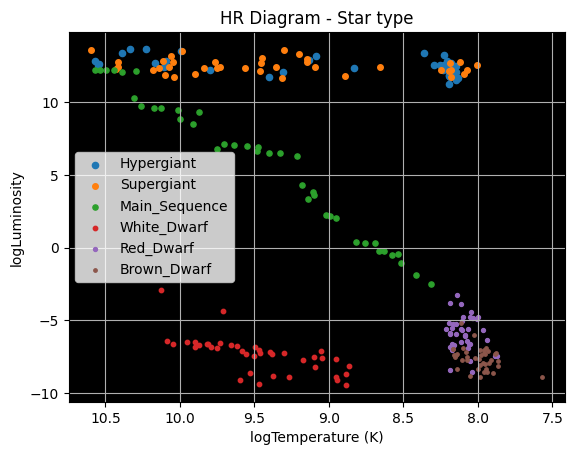

In [ ]:
plt.grid()
plt.scatter(np.log(Hypergiant["Temperature (K)"]), np.log(Hypergiant["Luminosity(L/Lo)"]),20, label = 'Hypergiant')
plt.scatter(np.log(Supergiant["Temperature (K)"]), np.log(Supergiant["Luminosity(L/Lo)"]),16, label = 'Supergiant')
plt.scatter(np.log(Main_Sequence["Temperature (K)"]), np.log(Main_Sequence["Luminosity(L/Lo)"]),14, label = 'Main_Sequence')
plt.scatter(np.log(White_Dwarf["Temperature (K)"]), np.log(White_Dwarf["Luminosity(L/Lo)"]),10, label = 'White_Dwarf')
plt.scatter(np.log(Red_Dwarf["Temperature (K)"]), np.log(Red_Dwarf["Luminosity(L/Lo)"]),8, label = 'Red_Dwarf')
plt.scatter(np.log(Brown_Dwarf["Temperature (K)"]), np.log(Brown_Dwarf["Luminosity(L/Lo)"]),6, label = 'Brown_Dwarf')
plt.gca().invert_xaxis()
plt.gca().set_facecolor('black')
plt.title("HR Diagram - Star type")
plt.ylabel("logLuminosity")
plt.xlabel("logTemperature (K)")
plt.legend()

In [ ]:
fig=px.scatter(dados, x = 'Temperature (K)', opacity=0.5, y = 'Luminosity(L/Lo)')
fig.update_layout(title = 'HR Diagram')
fig.update_xaxes(title = ' Temperatura (K)')
fig.update_yaxes(title = 'Luminosity (L/Lo)')
fig.show()


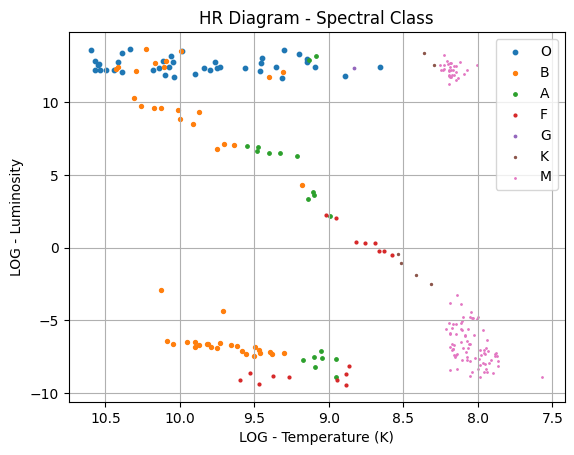

In [ ]:
plt.grid()
plt.scatter(np.log(O["Temperature (K)"]), np.log(O["Luminosity(L/Lo)"]),10, label ='O')
plt.scatter(np.log(B["Temperature (K)"]), np.log(B["Luminosity(L/Lo)"]),8, label = 'B')
plt.scatter(np.log(A["Temperature (K)"]), np.log(A["Luminosity(L/Lo)"]),6, label = 'A')
plt.scatter(np.log(F["Temperature (K)"]), np.log(F["Luminosity(L/Lo)"]),4, label = 'F')
plt.scatter(np.log(G["Temperature (K)"]), np.log(G["Luminosity(L/Lo)"]),3, label = 'G')
plt.scatter(np.log(K["Temperature (K)"]), np.log(K["Luminosity(L/Lo)"]),2, label = 'K')
plt.scatter(np.log(M["Temperature (K)"]), np.log(M["Luminosity(L/Lo)"]),1, label = 'M')
plt.gca().invert_xaxis()
plt.title("HR Diagram - Spectral Class")
plt.ylabel("LOG - Luminosity")
plt.xlabel("LOG - Temperature (K)")
plt.legend()

In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Star type, Length: 240, dtype: int64

# Splitting the data into training and testing datasets


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=2050 )

# Model training


# **Dummy**

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy = DummyClassifier()

In [ ]:
dummy.fit(x_train, y_train)

DummyClassifier()

In [ ]:
print('The accuracy of the baseline model (Dummy) was {}%'. format((dummy.score(x_test, y_test)*100).round(2)))

The accuracy of the baseline model (Dummy) was 11.11%


# **KNN**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
normalizacao = MinMaxScaler()
x_train_normalizado = normalizacao.fit_transform(x_train)

In [ ]:
pd.DataFrame(x_train_normalizado.round(2))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.19,0.70,0.04,0.15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.02,0.00,0.00,0.79
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.02,0.00,0.00,0.91
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.15,0.00,0.00,0.34
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.03,0.09,0.49,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.01,0.00,0.00,0.90
164,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.25,0.14,0.40,0.13
165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.97,0.44,0.76,0.06
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.02,0.00,0.00,1.00


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train_normalizado, y_train)

KNeighborsClassifier()

In [ ]:
x_teste_normalizado = normalizacao.transform(x_test)

In [ ]:
print('The accuracy using KNN was {}%'. format((knn.score(x_test, y_test)*100).round(2)))

The accuracy using KNN was 15.28%


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(random_state =2050, max_depth = 4)

In [ ]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=2050)

In [ ]:
print('The accuracy using decision tree was {}%'. format((arvore.score(x_test, y_test)*100).round(2)))

The accuracy using decision tree was77.78%


[Text(0.4, 0.9, 'x[28] <= 0.046\ngini = 0.832\nsamples = 168\nvalue = [27, 26, 32, 24, 29, 30]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32, 0, 0, 0]'),
 Text(0.6, 0.7, 'x[28] <= 403.45\ngini = 0.799\nsamples = 136\nvalue = [27, 26, 0, 24, 29, 30]'),
 Text(0.4, 0.5, 'x[29] <= -4.97\ngini = 0.749\nsamples = 106\nvalue = [27, 26, 0, 24, 29, 0]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 0, 0, 29, 0]'),
 Text(0.6, 0.3, 'x[29] <= 15.495\ngini = 0.666\nsamples = 77\nvalue = [27, 26, 0, 24, 0, 0]'),
 Text(0.4, 0.1, 'gini = 0.499\nsamples = 50\nvalue = [0, 26, 0, 24, 0, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 27\nvalue = [27, 0, 0, 0, 0, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 0, 0, 0, 30]')]

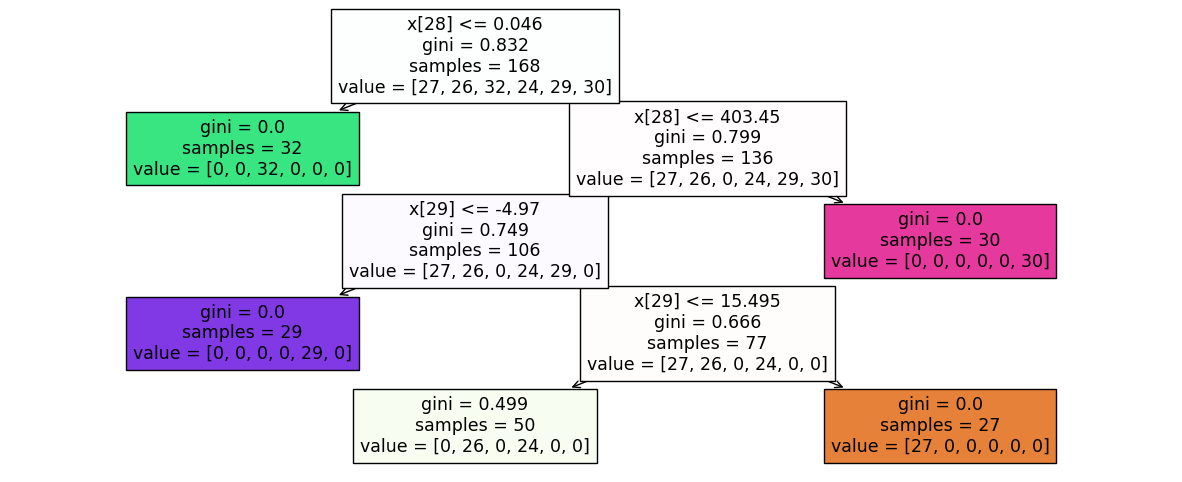

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,6))
plot_tree(arvore, filled = True)

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgbc = XGBClassifier(n_estimators=2, max_depth=2)

In [ ]:
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
predict = xgbc.predict(x_test)
predict

array([1, 3, 3, 2, 3, 5, 0, 4, 4, 0, 2, 3, 4, 0, 1, 3, 0, 5, 5, 3, 4, 3,
       2, 4, 1, 4, 3, 2, 5, 1, 1, 0, 2, 3, 2, 3, 0, 1, 5, 0, 3, 0, 5, 4,
       2, 3, 4, 2, 1, 1, 3, 0, 4, 1, 5, 4, 5, 4, 4, 1, 3, 3, 2, 5, 0, 0,
       4, 0, 5, 3, 1, 1])

In [ ]:
xgbc.score(x_test, y_test)

0.9305555555555556

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predict)
print(f'Erro Quadrático Médio: {mse:.2f}')

Erro Quadrático Médio: 0.19


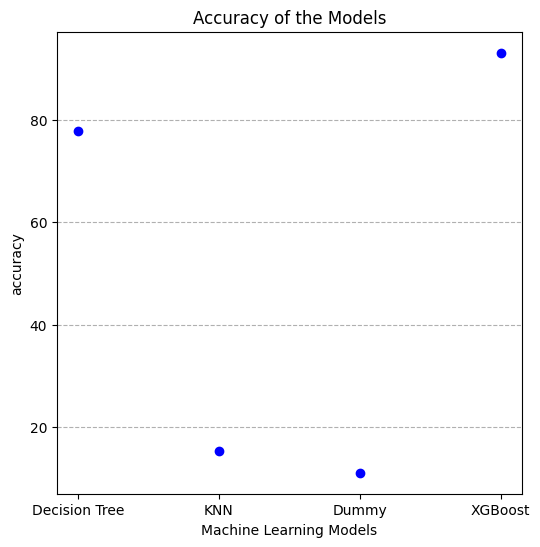

In [ ]:



modelos = ['Decision Tree', 'KNN', 'Dummy', 'XGBoost']
accuracy_1 = (arvore.score(x_test, y_test)*100).round(2)
accuracy_2 = (knn.score(x_test, y_test)*100).round(2)
accuracy_3 = (dummy.score(x_test, y_test)*100).round(2)
accuracy_4 = (xgbc.score(x_test, y_test)*100).round(2)

acuracias = [accuracy_1,accuracy_2,accuracy_3, accuracy_4 ]


plt.figure(figsize = (6,6))
plt.scatter(modelos, acuracias, color='blue')
plt.xlabel('Machine Learning Models')
plt.ylabel('accuracy')
plt.title('Accuracy of the Models')

plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()


In [ ]:
#Comparando os modelos

print('The accuracy using decision tree was {}%'. format((arvore.score(x_test, y_test)*100).round(2)))
print('The accuracy using KNN was {}%'. format((knn.score(x_test, y_test)*100).round(2)))
print('The accuracy of the baseline model (Dummy) was {}%'. format((dummy.score(x_test, y_test)*100).round(2)))
print('The accuracy using XGBoost was {}%'. format((xgbc.score(x_test, y_test)*100).round(2)))



The accuracy using decision tree was 77.78%
The accuracy using KNN was 15.28%
The accuracy of the baseline model (Dummy) was 11.11%
The accuracy using XGBoost was 93.06%


# Test using the model with the highest accuracy

In [ ]:
dados[200:201]

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
200,16790,0.0014,0.0121,12.87,2,Blue,B


In [ ]:

enter = x[200:201]

y_predicted1 = xgbc.predict(enter)
y_predicted1

array([2])

In [ ]:
y_predicted1

for pred in y_predicted1:
    if pred == 0:
        print("The star is a Brown Dwarf")
    elif pred == 1:
        print("The star is a Red Dwarf")
    elif pred == 2:
        print("The star is a White Dwarf")
    elif pred == 3:
        print("The star is in Main Sequence")
    elif pred == 4:
        print("The star is a Supergiant")
    elif pred == 5:
        print("The star is a Hypergiant")


The star is a White Dwarf


Brown Dwarf -> Star Type = 0

Red Dwarf -> Star Type = 1

White Dwarf-> Star Type = 2

Main Sequence -> Star Type = 3

Supergiant -> Star Type = 4

Hypergiant -> Star Type = 5

# **SVC**

# **Evaluating the Model**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_predicted = xgbc.predict(x_test)
y_predicted

array([1, 3, 3, 2, 3, 5, 0, 4, 4, 0, 2, 3, 4, 0, 1, 3, 0, 5, 5, 3, 4, 3,
       2, 4, 1, 4, 3, 2, 5, 1, 1, 0, 2, 3, 2, 3, 0, 1, 5, 0, 3, 0, 5, 4,
       2, 3, 4, 2, 1, 1, 3, 0, 4, 1, 5, 4, 5, 4, 4, 1, 3, 3, 2, 5, 0, 0,
       4, 0, 5, 3, 1, 1])

In [ ]:
matriz_confusao = confusion_matrix(y_test, y_predicted)



****


Brown Dwarf -> BD

Red Dwarf -> RD

White Dwarf-> WD

Main Sequence -> MS

Supergiant -> SG

Hypergiant -> HG










# Checking the hits and misses the XGBoost model through the confusion matrix









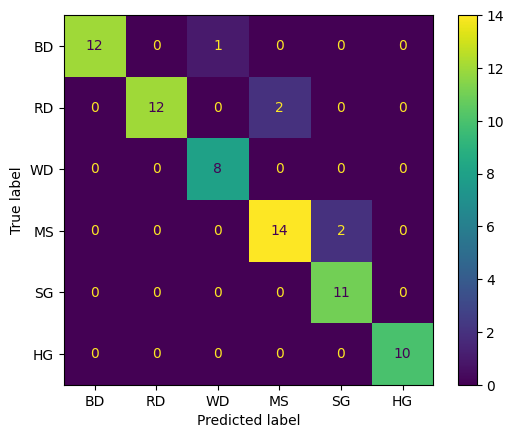

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizar1 = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels= ['BD', 'RD', 'WD', 'MS', 'SG', 'HG' ])

visualizar1.plot();


# **Understanding errors in predictions of the algorithm **

In [ ]:
Main_Sequence

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
30,39000,204000.000,10.600,-4.700,3,Blue,O
31,30000,28840.000,6.300,-4.200,3,Blue-white,B
32,15276,1136.000,7.200,-1.970,3,Blue-white,B
33,9700,74.000,2.890,0.160,3,Whitish,B
34,5800,0.810,0.900,5.050,3,yellow-white,F
35,8052,8.700,1.800,2.420,3,Whitish,A
36,6757,1.430,1.120,2.410,3,yellow-white,F
37,6380,1.350,0.980,2.930,3,yellow-white,F
38,5936,1.357,1.106,4.460,3,yellow-white,F
39,5587,0.819,0.990,5.030,3,yellow-white,F


In [ ]:
Red_Dwarf

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
10,3600,0.00290,0.5100,10.690,1,Red,M
11,3129,0.01220,0.3761,11.790,1,Red,M
12,3134,0.00040,0.1960,13.210,1,Red,M
13,3628,0.00550,0.3930,10.480,1,Red,M
14,2650,0.00060,0.1400,11.782,1,Red,M
15,3340,0.00380,0.2400,13.070,1,Red,M
16,2799,0.00180,0.1600,14.790,1,Red,M
17,3692,0.00367,0.4700,10.800,1,Red,M
18,3192,0.00362,0.1967,13.530,1,Red,M
19,3441,0.03900,0.3510,11.180,1,Red,M


In [ ]:
import plotly.express as px
dados_red_main = pd.merge(Main_Sequence, Red_Dwarf, how = 'outer')
dados_red_main

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,39000,204000.00000,10.600,-4.700,3,Blue,O
1,30000,28840.00000,6.300,-4.200,3,Blue-white,B
2,15276,1136.00000,7.200,-1.970,3,Blue-white,B
3,9700,74.00000,2.890,0.160,3,Whitish,B
4,5800,0.81000,0.900,5.050,3,yellow-white,F
...,...,...,...,...,...,...,...
75,3598,0.00270,0.670,13.667,1,Red,M
76,3142,0.00132,0.258,14.120,1,Red,M
77,3496,0.00125,0.336,14.940,1,Red,M
78,3324,0.00650,0.471,12.780,1,Red,M


In [ ]:
dados_red_main['Star type'].unique()

array([3, 1])

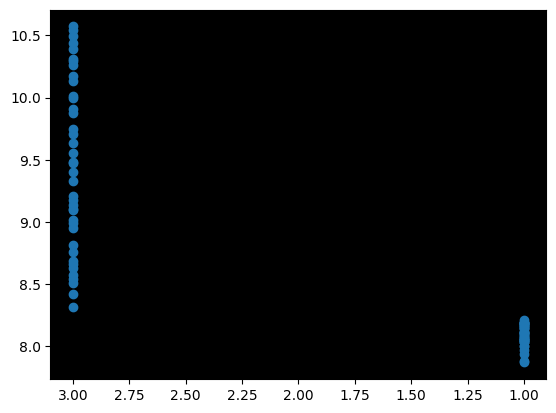

In [ ]:
plt.scatter(dados_red_main['Star type'], np.log(dados_red_main['Temperature (K)']) )
plt.gca().invert_xaxis()
plt.gca().set_facecolor('black');

# **Simulator**

In [ ]:
Temperature = input(float('Temperatura: '))
Luminosity = input(float('Luminosity(L/Lo): '))
Radius = input(float('Radius(R/Ro): '))
magnitude = input(float('Absolute magnitude(Mv): '))
star_color = input(float('Star color'))
spectral = input(float('Spectral Class'))

arvore.predict(entrada)